In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Rescaling
import os
import matplotlib.pyplot as plt



In [2]:
DATASET_PATH = "/content/drive/MyDrive/Indian sign language"

classes_to_process = ['A', 'B', 'C', 'L', 'V', 'W', '3', '5', '7', '9']
num_classes = len(classes_to_process)


In [5]:
#resize all images to a standard size
Image_size = (128, 128)
Batch_size = 32


In [7]:
# Load the Image Data
train_data = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels='inferred',
    label_mode='int',
    class_names=classes_to_process,
    image_size=Image_size,
    batch_size=Batch_size,
    validation_split=0.2,
    subset='training',
    seed=42
)

Found 12337 files belonging to 10 classes.
Using 9870 files for training.


In [9]:
test_data = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    labels='inferred',
    label_mode='int',
    class_names=classes_to_process,
    image_size=Image_size,
    batch_size=Batch_size,
    validation_split=0.2,
    subset='validation',
    seed=42
)


Found 12337 files belonging to 10 classes.
Using 2467 files for validation.


In [11]:
# Preprocess the Data
preprocessing_model = Sequential([
    Rescaling(1./255)
])

# Apply the preprocessing to datasets
train_data = train_data.map(lambda x, y: (preprocessing_model(x), y))
test_data = test_data.map(lambda x, y: (preprocessing_model(x), y))
train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
# Build the CNN Architecture
model = Sequential()
model.add(Input(shape=(Image_size[0], Image_size[1], 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))# 1st Convolutional Block
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))# 2nd Convolutional Block
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))# 3rd Convolutional Block
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())# Flatten the 2D feature maps into a 1D vector
model.add(Dense(128, activation='relu'))# Add a standard DNN on top
model.add(Dropout(0.5)) # Dropout helps prevent overfitting
model.add(Dense(num_classes, activation='softmax'))# Output layer

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Compile the Model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras import callbacks

In [19]:
tbCallBack =callbacks.TensorBoard(log_dir = "tbGraph/")

In [20]:
# Train the Model
history = model.fit(train_data,epochs=20,validation_data=test_data,callbacks = [tbCallBack])

Epoch 1/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 2257s 7s/step - accuracy: 0.1152 - loss: 2.3032 - val_accuracy: 0.1184 - val_loss: 2.3014
Epoch 2/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1204 - loss: 2.3009 - val_accuracy: 0.1184 - val_loss: 2.3012
Epoch 3/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1204 - loss: 2.3003 - val_accuracy: 0.1184 - val_loss: 2.3010
Epoch 4/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1204 - loss: 2.3001 - val_accuracy: 0.1184 - val_loss: 2.3012
Epoch 5/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.1204 - loss: 2.3006 - val_accuracy: 0.1184 - val_loss: 2.3012
Epoch 6/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1204 - loss: 2.3005 - val_accuracy: 0.1184 - val_loss: 2.3013
Epoch 7/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1204 - loss: 2.3005 - val_accuracy: 0.1184 - val_loss: 2.3012
Epoch 8/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1204 - loss: 2.3002 - val_acc

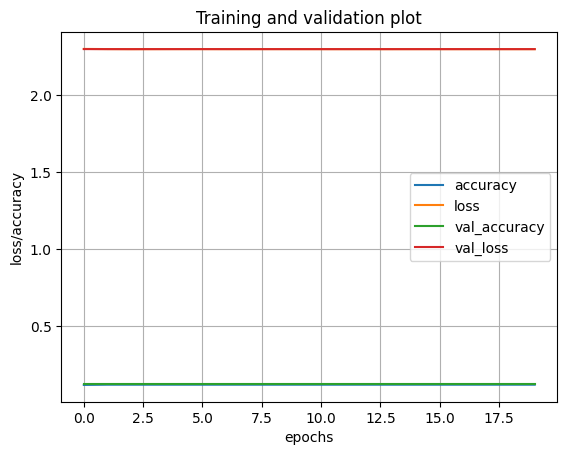

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [22]:
# Evaluate the Model
print("\nEvaluating CNN model on test data:")
loss, accuracy = model.evaluate(test_data)



Evaluating CNN model on test data:
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1199 - loss: 2.3012


In [23]:
print(f"Test Loss: {loss:.4f}")


Test Loss: 2.3011


In [24]:
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 11.84%
